In [1]:
# importing necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
# Calculating the class distribution
class_distribution = pd.Series(y_train).value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


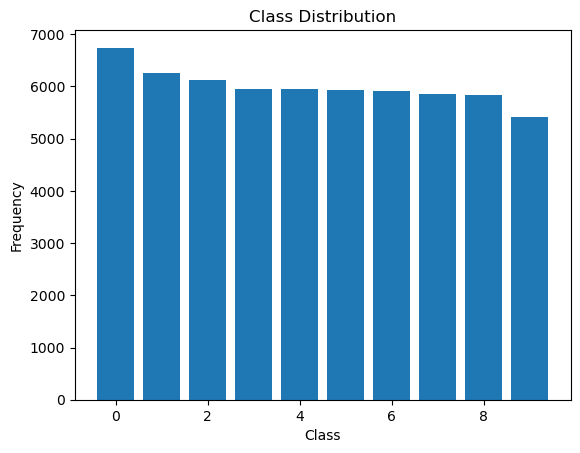

In [5]:
# bar plot distribution each classes
plt.bar(range(10), class_distribution)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

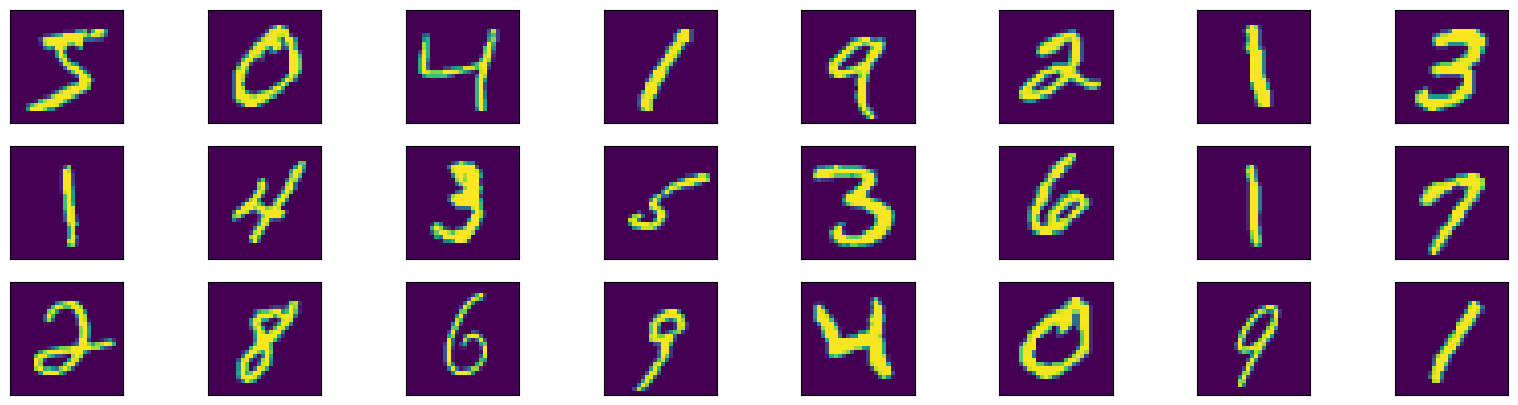

In [7]:
# displaying image in range of 24
fig = plt.figure(figsize=(20,5))
for i in range(24):
    ax = fig.add_subplot(3, 8, i + 1,yticks=[], xticks=[] )
    ax.imshow(np.squeeze(x_train[i]))

In [8]:
# reshaping and traing the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#reshaping the data and defining the input shape, preparing the data for a CNN model 
#that will process images with a height and width of 28 pixels, and a single color channel (grayscale).

In [9]:
# normalizing the data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
#Normalizing the pixel values to a range of 0 to 1 

In [10]:
pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

## CNN

In [11]:
from keras.utils import to_categorical
from tensorflow import keras
import numpy as np

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)#Convert the array value(Class vector) into matrix
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape) 

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (55000, 28, 28, 1)
55000 train samples
10000 test samples
5000 validation samples


In [12]:
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# model to optimize for categorical cross-entropy loss using the RMSProp optimizer 
# and evaluates its performance using accuracy as the metric.

In [14]:
epochs = 10  # train the model for 10 epochs
hist = model.fit(x_train, y_train, batch_size=32, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.8874 - loss: 0.3458 - val_accuracy: 0.9838 - val_loss: 0.0522
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accuracy: 0.9901 - val_loss: 0.0324
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9887 - val_loss: 0.0363
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 62s 36ms/step - accuracy: 0.9925 - loss: 0.0252 - val_accuracy: 0.9862 - val_loss: 0.0430
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - accuracy: 0.9928 - loss: 0.0221 - val_accuracy: 0.9904 - val_loss: 0.0325
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - accuracy: 0.9944 - loss: 0.0187 - val_accuracy: 0.9901 - val_loss: 0.0367
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.9959 - loss: 0.0142 - val_accuracy: 0.9921 - val_loss: 0.0341
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 62s 36ms/step - accuracy: 0.9966 -

In [15]:
#accuracy
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
cnn_accuracy = np.mean(y_pred_class == np.argmax(y_test, axis=1))
print('Test accuracy:', cnn_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Test accuracy: 0.9887


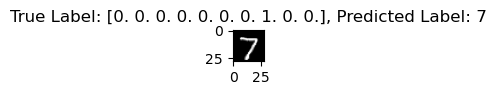

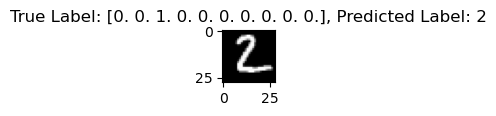

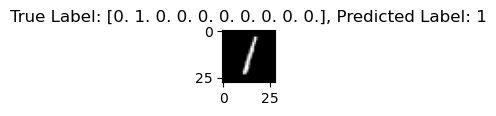

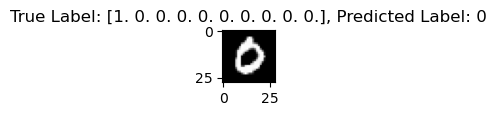

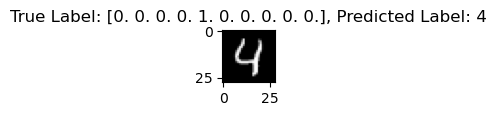

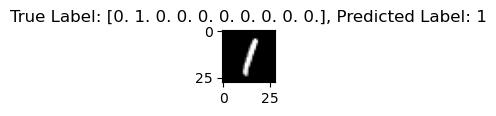

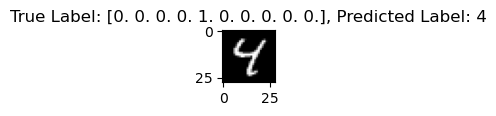

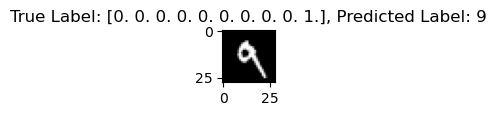

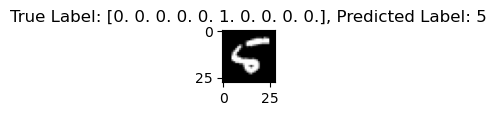

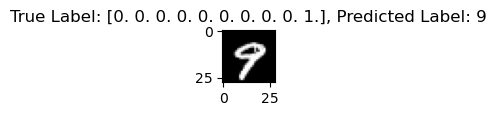

<Figure size 600x800 with 0 Axes>

In [34]:
# Display the batch of images with the true and predicted labels
for i in range(10):
    plt.subplot(10,1, i+1)
    plt.imshow(np.squeeze(x_test[i]), cmap='gray')
    plt.title(f'True Label: {y_test[i]}, Predicted Label: {predicted_classes[i]}')
    plt.figure(figsize=(6,8))
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


## K-nearest neighbors

Accuracy: 0.9715
Test Accuracy: 0.9670


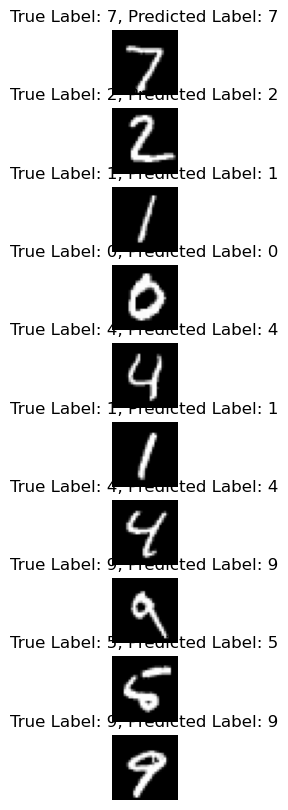

In [35]:
from sklearn.neighbors import KNeighborsClassifier
# Load the MNIST dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = knn.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {knn_accuracy:.4f}")
# Plot the first 10 images with their true and predicted labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(10, 1, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"True Label: {y_test[i]}, Predicted Label: {y_pred[i]}")
    plt.axis("off")
plt.show()

## Support Vector Machine

Accuracy: 0.9776
Test Accuracy: 0.9777


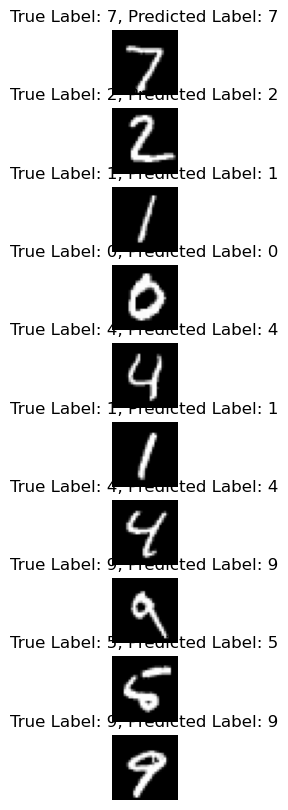

In [37]:
# Load the MNIST dataset
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Create a svc classifier
svclassifier = SVC()

# Train the classifier
svclassifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = svclassifier.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred = svclassifier.predict(X_test)

# Calculate the accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {svm_accuracy:.4f}")
# Plot the first 10 images with their true and predicted labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(10, 1, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"True Label: {y_test[i]}, Predicted Label: {y_pred[i]}")
    plt.axis("off")
plt.show()

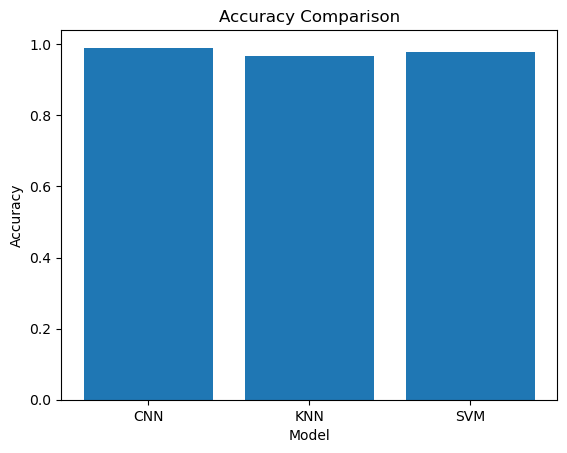

In [41]:
# c
import matplotlib.pyplot as plt

models = ['CNN', 'KNN', 'SVM']
accuracies = [cnn_accuracy, knn_accuracy, svm_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

In [ ]:
#The CNN model outperforms the other two models, SVM and KNN, in terms of accuracy. 
#This suggests that the CNN model is the most effective in classifying the data.